Introduction to Shapley
=======================

[Serge Rey](http://sergerey.org)

We begin our series on geospatial data analysis with a look at the
library [Shapely](https://shapely.readthedocs.io/en/latest/). Shapely
supports the creation, manipulation, and analysis of planar geometric
objects. Its role in the Python geospatial ecosystem is to provide
fundamental support for vector data models, which in turn are built up
from points, lines, and polygons.

### Objectives

-   Understand the purpose of Shapely
-   Gain familiarity with core geometric types (Point, LineString,
    Polygon, and their collection types)
-   Explore deterministic spatial analysis and relationships

### Basic Imports

We will utilize a common set of imports across notebooks to facilitate
plotting:

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Matplotlib is the workhorse of visualization in Python so we import it
first. We also alias `matplotlib's` `pyplot` module as `plt`. `numpy` is
the core mathematical library for Python and we alias it as `np`.
Finally, we use the Jupyter *magic* `%matplotlib inline` to ensure that
any plots we generate are shown within the notebook itself (i.e.,
inline).

Basic Geometric Types
=====================

Points
------

Our first primitive geometry type is a **Point**. We import the class
for creating point objects from shapely\'s `geometry` module:

In [2]:
from shapely.geometry import Point

With the class imported, we can instantiate two example points:

In [3]:
p_1 = Point((2.0, 5.0))
p_2 = Point((4.0, 7,0))

and inspect their values:

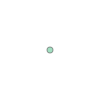

In [4]:
p_1

and here:

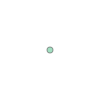

In [5]:
p_2

As we see, the inspection generates a plot of the point object. Shapely
is a geometric library so this makes sense.

We can introspect the point object to learn more:

In [6]:
p_1.xy

(array('d', [2.0]), array('d', [5.0]))

and we learn that the coordinates for `p_1` are stored in an attribute
that is of type `numpy array`.

If we want to check the `type` of of Python object we do so as follows:

In [7]:
type(p_1)

shapely.geometry.point.Point

So points are straightforward, we pass in a tuple of x,y coordinates and
we get back a point object.

While simple, they are useful in that they can do things. Things like
measure the distance from each other:

In [8]:
p_1.distance(p_2)

2.8284271247461903

and

In [9]:
p_2.distance(p_1)

2.8284271247461903

Points are zero-dimensional geometric objects, meaning they do not have
area or length.

LineStrings
-----------

Our next geometric type is a `LineString`. This is a sequence of points
connected with a segment. We import the class in the same way we did for
our `Point` class:

In [10]:
from shapely.geometry import LineString

Let\'s now reuse our two point objects as arguments to construct the
first `LineString`:

In [11]:
l_1 = LineString([(2.0, 5.0), (4.0,7.0)])

and we get:

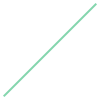

In [12]:
l_1 

which plots the single segment for our `LineString` object.

`LineStrings` are one-dimensional, and that dimension is *length*:

In [13]:
l_1.length

2.8284271247461903

And, again, we can check the objects type:

In [14]:
type(l_1)

shapely.geometry.linestring.LineString

Like, points, `LineStrings` also have a distance method:

In [15]:
p_3 = Point(3, 5)
l_1.distance(p_3)

0.7071067811865476

Note, this is the minimum distance between `l_1` and `p_3`:

In [16]:
p_3.distance(p_1) > l_1.distance(p_3) and p_3.distance(p_2) > l_1.distance(p_3)

True

LineStrings can have more than a single pair of points:

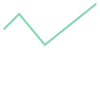

In [17]:
l_2 = LineString([(2.0, 4.0), (5.0, 7.0), (10,1), (20,9)])
l_2

and this is a longer object:

In [18]:
l_2.length > l_1.length

True

A very useful construct is a *bounding rectangle* which is a rectangle
that contains a geometric object. We can get the coordinates for the
bounding rectangle for `l_2` as follows:

In [19]:
l_2.bounds

(2.0, 1.0, 20.0, 9.0)

Bounding rectangles are used to filter objects when testing for
different types of spatial relationships, such as containment,
intersection, touching, and more. We will return to these below.

LinearRings
-----------

An ordered sequence of point tuples can be used to construct a
`LinearRing`. At first glance this seems redundant, since a `LineString`
is an ordered sequence of point tuples. However, a `LinearRing` is
distinct from a `LineString` in four ways:

-   The sequence will be closed (i.e., the first and last point will be
    equal)
-   It does not cross itself
-   It does not touch itself at a single point

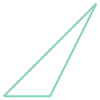

In [20]:
from shapely.geometry.polygon import LinearRing
r1 = LinearRing([(2.0, 5.0), (4.0, 7.0), (3.0, 5.0)])
r1

We see that the ring is closed even though the last point tuple we
passed in was not equal to the first.

Although the ring looks like a polygon (our next geometric primitive),
it isn\'t one as the ring has zero-area:

In [21]:
r1.area

0.0

but it does have length:

In [22]:
r1.length

6.06449510224598

and its coordinates can be obtained as:

In [23]:
list(r1.coords)

[(2.0, 5.0), (4.0, 7.0), (3.0, 5.0), (2.0, 5.0)]

Again, note the additional point tuple beyond what we passed in when
creating the ring above.

Polygons
--------

Our fourth geometry type is a **Polygon**:

In [24]:
from shapely.geometry import Polygon

`Polygon` takes two positional arguments, where the first is a sequence
of ordered point tuples that define the polygon\'s exterior ring, and
the second is a sequence of interior rings that define holes.

For example, let\'s start with a simple polygon with a single exterior
ring:

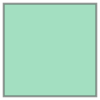

In [25]:
poly_1 = Polygon([(0, 0), (10, 0), (10, 10), (0, 10)])
poly_1

Like the `LinearRing` the polygon will be closed if we don\'t do so
explicitly. However, unlike the `LinearRing` the `Polygon` will have
non-zero area:

In [26]:
poly_1.area

100.0

`Polygons` have length:

In [27]:
poly_1.length

40.0

and an exterior:

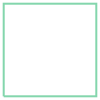

In [28]:
poly_1.exterior

which is a `LinearRing`:

In [29]:
type(poly_1.exterior)

shapely.geometry.polygon.LinearRing

A more complex polygon is one with holes:

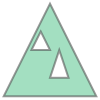

In [30]:
poly_2 = Polygon([(10, 0), (20,0), (15, 10)],
                 [[(13, 5), (14,7), (15,5) ],
                  [(15, 2),  (16, 5), (17, 2)]])
poly_2

The holes do not count toward the polygon\'s area:

In [31]:
poly_2.area

45.0

whereas:

In [32]:
Polygon(poly_2.exterior.coords).area

50.0

and

In [33]:
h1, h2 = [Polygon(h) for h in list(poly_2.interiors)]
h1.area + h2.area + poly_2.area

50.0

Container (Multi) Types
=======================

In addition to these primitive geometric types, Shapely provides what
are known as *collection types*. These serve two purposes. First, as we
will see below, certain *spatial operations* can result in a collection
of geometric objects, and thus there is a need to have a structure to
hold these collections. Second, within GIS applications, it is sometimes
necessary to represent a single feature as a collection of geometric
objects. For example, think of the state of California which is composed
of one mainland polygon and eight polygons for the Channel Islands. The
state feature would be represented as a collection of these nine
polygons.

MultiPoints
-----------

For `Points`:

In [34]:
from shapely.geometry import MultiPoint
mp_1 = MultiPoint([p_1, p_2])

MultiPoints have a number of useful attributes:

In [35]:
mp_1.bounds

(2.0, 5.0, 4.0, 7.0)

and

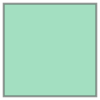

In [36]:
mp_1.envelope

Let\'s create a new collection:

In [37]:
mp_2 = MultiPoint([p_1, p_2, Point(-7, 2)])

and inspect:

In [38]:
mp_2.bounds

(-7.0, 2.0, 4.0, 7.0)

The `MultiPoint` is cleary distnct from its component `Points`

In [39]:
p_1.bounds

(2.0, 5.0, 2.0, 5.0)

MultiLineStrings
----------------

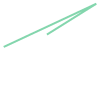

In [40]:
from shapely.geometry import MultiLineString

l_2 = LineString([(0, 0), (15, 7), (7, 2)])
l_2

Recall our earlier `LineString`:

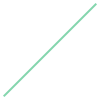

In [41]:
l_1

and put them together into a `MultiLineString`:

In [42]:
mls_1 = MultiLineString((l_1, l_2))

If we want the bounding rectangle for the pair of `LineStrings` we can
query the `MultiLineString`:

In [43]:
mls_1.bounds

(0.0, 0.0, 15.0, 7.0)

which is different from the individual bounds:

In [44]:
l_1.bounds

(2.0, 5.0, 4.0, 7.0)

and

In [45]:
l_2.bounds

(0.0, 0.0, 15.0, 7.0)

MultiPolygons
-------------

In [46]:
from shapely.geometry import MultiPolygon

Spatial Relationships
=====================

Shapely supports a number of natural language relationships between
geometric objects.

Intersects
----------

In [47]:
l_1 = LineString( ( (10,5), (10,15) ) )
l_2 = LineString( ( (5,8), (12, 9) ) )
l_3 = LineString( ( (11, 15), (17, 8) ) )

Do `l_1` and `l_2` intersect?

In [48]:
l_1.intersects(l_2)

True

How about `l_1` and `l_3`?

In [49]:
l_1.intersects(l_3)

False

Intersects works for different geometric types as well:

In [50]:
poly_1 = Polygon(((9, 6), (12, 8), (12, 1), (9, 1))) 
l_1.intersects(poly_1)

True

Contains and Within
-------------------

In [51]:
p_1 = Point(11, 7)
poly_1.contains(p_1)

True

And from the perspective of `p_1` it is *within* `poly_1`:

In [52]:
p_1.within(poly_1)

True

Crosses
-------

`poly_1` crosses `l_1`

In [53]:
poly_1.crosses(l_1)

True

because its interior intersects, but does not contain, the interior of
`l_1`:

In [54]:
poly_1.contains(l_1)

False

Touches
-------

In [55]:
poly_2 = Polygon([(0, 0), (0, 2), (2, 2), (2, 0) ])
line_2 = LineString([ (0, 1), (-1, 2) ] )
line_3 = LineString([ (2, 1), (1, 1) ] )
line_2.touches(poly_2)

True

but:

In [56]:
line_3.touches(poly_2)

False

because:

In [57]:
line_3.within(poly_2)

True

while

In [58]:
line_2.within(poly_2)

False

Spatial Operations
==================

Many times we are not only interested in testing for a geometrical
relationship between two objects, but also in obtaining a new geometric
object that results from that relationship. **Spatial Operations**
accomplish this for us.

Intersections
-------------

In [59]:
poly_1 = Point((10, 10)).buffer(6)
poly_2 = Point((20, 10)).buffer(6)
mp = MultiPolygon((poly_1, poly_2))

We will import the library `decartes` to facilitate visualization of
these operations:

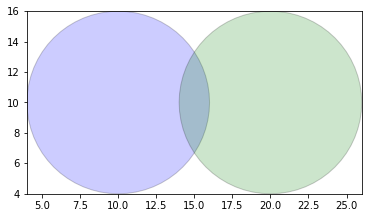

In [60]:
import descartes
ax = plt.gca()
ax.add_patch(descartes.PolygonPatch(poly_1, fc='b', ec='k', alpha=0.2))
ax.add_patch(descartes.PolygonPatch(poly_2, fc='g', ec='k', alpha=0.2))
minx, miny, maxx, maxy = mp.bounds
ax.set_xlim(minx, maxx); ax.set_ylim(miny, maxy)
ax.set_aspect('equal')
plt.show()

Testing the relationships we see:

In [61]:
poly_1.intersects(poly_2)

True

and

In [62]:
poly_2.intersects(poly_1)

True

Getting the object from this relationship is done as follows:

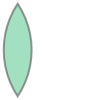

In [63]:
int_1_2 = poly_1.intersection(poly_2)
int_1_2

And its type is:

In [64]:
type(int_1_2)

shapely.geometry.polygon.Polygon

Difference
----------

Continuing on with set theoretic operations:

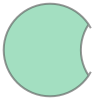

In [65]:
poly_1.difference(int_1_2)

and

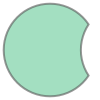

In [66]:
poly_1.difference(poly_2)

but

In [67]:
type(int_1_2)

shapely.geometry.polygon.Polygon

Union
-----

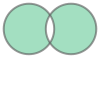

In [68]:
u_1_2 = poly_1.union(poly_2)

u_1_2

d_1_2 = poly_1.difference(poly_2)
d_2_1 = poly_2.difference(poly_1)

d_1_2

d_2_1

d_1_2.union(d_2_1)

Cascaded Union
--------------

Let\'s use another special operation:

In [69]:
from shapely.ops import cascaded_union

Putting things back together:

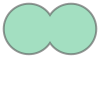

In [70]:
cu = cascaded_union([d_1_2, d_2_1, int_1_2])
cu

Putting things partially back together:

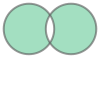

In [71]:
d_1_2_d_2_1 = d_1_2.union(d_2_1)
d_1_2_d_2_1

A testing point:

In [72]:
p = Point(15, 10)
d_1_2_d_2_1.contains(p)

False

but:

In [73]:
cu.contains(p)

True

Buffers
-------

We already saw the use of the `buffer` method above in constructing
circles, which were nothing more than a `Polygon` that results from a
`Point` calling its `buffer` method. `buffer` is a method that all
primitives and collection types poses.

LineString:

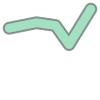

In [74]:
l_3 = LineString([(20, 5), (30, 7), (37, 6), (42, -1), (50, 12)])
buf_l_3 = l_3.buffer(2)
buf_l_3

And it is a `Polygon`

In [75]:
type(buf_l_3)

shapely.geometry.polygon.Polygon

while the calling object was a `LineString`:

In [76]:
type(l_3)

shapely.geometry.linestring.LineString

The relation between the buffer and the original object looks like:

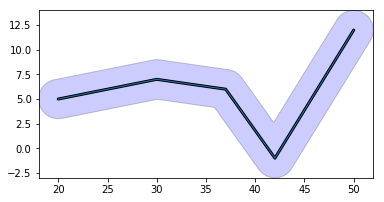

In [77]:
ax = plt.gca()
ax.add_patch(descartes.PolygonPatch(buf_l_3, fc='b', ec='k', alpha=0.2))
ax.add_patch(descartes.PolygonPatch(l_3.buffer(0.1)))
minx, miny, maxx, maxy = buf_l_3.bounds
ax.set_xlim(minx, maxx); ax.set_ylim(miny, maxy)
ax.set_aspect('equal')
plt.show()

As a more complicated example consider two sections of a road network,
the sections are `LineStrings`:

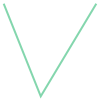

In [78]:
l_1 = LineString([(5, 10), (7, 5), (10, 10)])
l_1

and

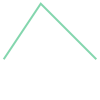

In [79]:
l_2 = LineString([(5, 0), (7, 3), (10, 0)])
l_2

and they are combined into the network as a `MultiLineString`:

In [80]:
ml = MultiLineString([l_1, l_2])

We can buffer the `MultiLineString`, but the result will depend on the
size of the buffer:

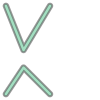

In [81]:
b1 = ml.buffer(0.25)
b1

with:

In [82]:
type(b1)

shapely.geometry.multipolygon.MultiPolygon

If we increase the size of the buffer:

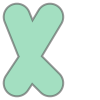

In [83]:
b2 = ml.buffer(2.0)
b2

we get a single `Polygon`

In [84]:
type(b2)

shapely.geometry.polygon.Polygon

Shapely as a Simple GIS
=======================

As a precursor for the rest of this workshop series, let\'s consider how
Shapely might be used as a simple GIS.

Consider the simple landscape below that has three census tracks (as
`Polygons`) and a highway (a `LineString`):

In [85]:
tract_1 = Polygon([(0, 0), (0, 10), (10, 10), (10, 0)])
tract_2 = Polygon([(10, 0), (10, 10), (20, 10), (20, 0)])
tract_3 = Polygon([(20, 0), (20, 10), (30, 10), (30, 0)])
highway = LineString( [(-4, -4), (5, -4), (5, 15),
                       (25, 15), (25, -1), (34,-1)]).buffer(0.01)

Our urban landscape looks like:

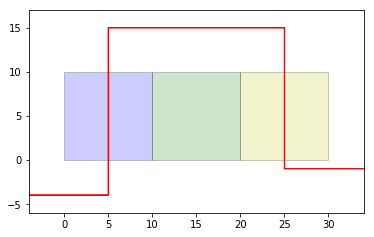

In [87]:
ax = plt.gca()
ax.add_patch(descartes.PolygonPatch(tract_1, fc='b', ec='k', alpha=0.2))
ax.add_patch(descartes.PolygonPatch(tract_2, fc='g', ec='k', alpha=0.2))
ax.add_patch(descartes.PolygonPatch(tract_3, fc='y', ec='k', alpha=0.2))
ax.add_patch(descartes.PolygonPatch(highway, fc='k', ec='red'))
minx, miny, maxx, maxy = highway.bounds
ax.set_xlim(minx, maxx); ax.set_ylim(miny-2, maxy+2)
ax.set_aspect('equal')
plt.show()

We combine the three polygons inside a `MultiPolygon` object as this
will simplify some bounds checking.

In [88]:
city = MultiPolygon([tract_1, tract_2, tract_3])

For example, let\'s test if the highway intersects the collection of
tracts - think of the collection as say a city, so we are in effect
asking if the network intersects the city:

In [89]:
highway.intersects(city)

True

Since it does intersect the city, we might be interested in determining
how much of the network is within the city boundaries:

In [90]:
highway_in_city = highway.intersection(city)
lic = highway_in_city.length
ltot = highway.length
print("The city contains %2.2f miles or %f of the network."%(lic, lic/ltot))

The city contains 40.08 miles or 0.274435 of the network.


and we can see the segments in the city:

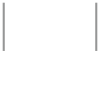

In [91]:
highway_in_city

We may also be interested in identifying which tracts within the city
intersect the network:

In [92]:
hit = [tract for tract in [tract_1, tract_2, tract_3] if highway.intersects(tract)]

`hit` is a list of the two tracts that intersect with the network:

In [93]:
hit

as can be seen below:

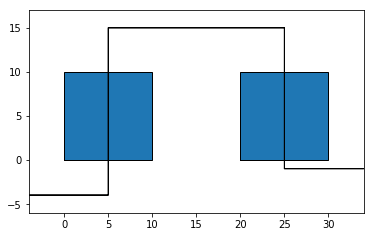

In [94]:
hit.append(highway)
ax = plt.gca()
for feature in hit:
    ax.add_patch(descartes.PolygonPatch(feature))
ax.set_xlim(minx, maxx); ax.set_ylim(miny-2, maxy+2)
ax.set_aspect('equal')
plt.show()

Later on, we will utilize similar functionality to add attributes to the
tracts to distinguish those that intersect a network from tracts that do
not intersect the network. This is known as a *spatial join* since we
are joining information from the network to the tracts.

Using a Buffer
--------------

Let\'s make our city a little bit more interesting. Suppose a state
government agency has discovered a toxic waste site located 1 mile south
of the city. State regulations are such that any residents within 2
miles of the newly discovered site have to be notified.

To determine what residents need to be notified, we will first create a
*buffer* around the hazard location, and then test for the intersection
of the buffer with the tracts.

Step 1: we create the point and its buffer:

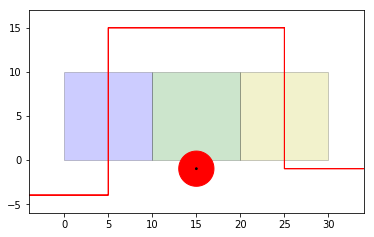

In [95]:
hazard_point = Point(15, -1)
buffer = hazard_point.buffer(2)
ax = plt.gca()
ax.add_patch(descartes.PolygonPatch(tract_1, fc='b', ec='k', alpha=0.2))
ax.add_patch(descartes.PolygonPatch(tract_2, fc='g', ec='k', alpha=0.2))
ax.add_patch(descartes.PolygonPatch(tract_3, fc='y', ec='k', alpha=0.2))
ax.add_patch(descartes.PolygonPatch(highway, fc='k', ec='red'))
ax.add_patch(descartes.PolygonPatch(buffer, fc='r', ec='red'))
ax.add_patch(descartes.PolygonPatch(hazard_point.buffer(0.1), fc='k', ec='k'))
minx, miny, maxx, maxy = highway.bounds
ax.set_xlim(minx, maxx); ax.set_ylim(miny-2, maxy+2)
ax.set_aspect('equal')
plt.show()

Step 2, we find out which tracts intersect with the buffer:

In [96]:
to_warn = [tract for tract in [tract_1, tract_2, tract_3] if buffer.intersects(tract)]
to_warn

Summary
=======

We have touched on only the more commonly encountered features of
Shapely when dealing with geospatial data. Before moving on to other
parts of the Python geospatial stack, it is important to note several
things.

First, shapely does not support coordinate system transformations, and
all of its functionality assumes features exist in the same Cartesian
plane. Second, we will see that other popular packages in the geospatial
Python stack actually use Shapely as a dependency and they themselves
deal with coordinate transformations. Third, we will introduce other
Shapely operations later on in this series as we have need. Finally,
readers are encouraged to more fully explore the [The Shapely User
Manual](https://toblerity.org/shapely/).

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc-
sa/4.0/"><img alt="Creative Commons License" style="border-width:0"
src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span
xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Introduction to Shapley</span> by <a xmlns:cc="http://creativecommons.org/ns#"
href="http://sergerey.org" property="cc:attributionName"
rel="cc:attributionURL">Serge Rey</a> is licensed under a <a
rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative
Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.